Homework 7 Key
====
#### CHE 116: Numerical Methods and Statistics

3/8/2018

----

In [17]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import seaborn as sns
plt.style.use('seaborn-whitegrid')

import pydataset

1. Conceptual Questions (8 Points)
===
*Answer these in Markdown*

1. [1 point] In problem 4 from HW 3 we discussed probabilities of having HIV and results of a test being positive. What was the sample space for this problem? 
2. [4 points] One of the notations in the answer key is a random variable $H$ which indicated if a person has HIV. Make a table showing this functions inputs and outputs for the sample space. [Making Markdown Tables](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables)
3. [1 point] A probability density function is used for what types of probability distributions?
4. [2 points] What is the probability of $t > 4$ in an exponential distribution with $\lambda = 1$? Leave your answer in terms of an exponential.

### 1.1
First element is HIV and second is test
$$
\{ (0,0), (1,0), (0,1), (1,1)\}
$$

### 1.2
|$x$|$H$|
|---|---:|
|(0,0)| 0|
|(0,1)| 0|
|(1,0)| 1|
|(1,1)| 1|

### 1.3
Continuous

### 1.4
$$
\int_4^{\infty} e^{-t} \, dt = \left. -e^{-t}\right]_4^{\infty} = 0 - - e^{-4} = e^{-4}
$$

2. The Nile (10 Points)
===

*Answer in Python*

1. [4 points] Load the Nile dataset and convert to a numpy array. It contains measurements of the annual flow of the river Nile at Aswan. Make a scatter plot of the year vs flow rate. If you get an error when loading `pydataset` that says `No Module named 'pydataset'`, then execute this code in a new cell once: `!pip install pydataset`

2. [2 points] Report the correlation coefficient between year and flow rate.

2. [4 points] Create a histogram of the flow rates and show the median with a vertical line. Labels your axes and make a legend indicating what the vertical line is.

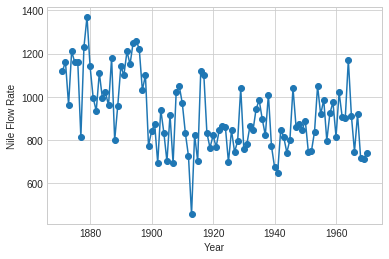

In [35]:
#2.1
nile = pydataset.data('Nile').as_matrix()
plt.plot(nile[:,0], nile[:,1], '-o')
plt.xlabel('Year')
plt.ylabel('Nile Flow Rate')
plt.show()

In [34]:
#2.2
print('{:.3}'.format(np.corrcoef(nile[:,0], nile[:,1])[0,1]))

-0.465


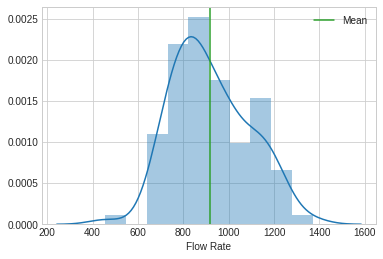

In [44]:
#2.3 ok to distplot or plt.hist
sns.distplot(nile[:,1])
plt.axvline(np.mean(nile[:,1]), color='C2', label='Mean')
plt.legend()
plt.xlabel('Flow Rate')
plt.show()

2. Insect Spray (10 Points)
===

*Answer in Python*

1. [2 points] Load the 'InsectSpray' dataset, convert to a numpy array and print the number of rows and columns. Recall that numpy arrays can only hold one type of data (e.g., string, float, int). What is the data type of the loaded dataset?

2. [2 points] Using `np.unique`, print out the list of insect spray used. This data is a count insects on a crop field with various insect sprays.

3. [4 points] Create a violin plot of the data. Label your axes.

4. [2 points] Which insect spray worked best? What is the mean number of insects for the best insect spray?

In [47]:
#1.1
insect = pydataset.data('InsectSprays').as_matrix()
print(insect.shape, 'string or object is acceptable')


(72, 2) string or object is acceptable


In [48]:
#1.2
print(np.unique(insect[:,1]))

['A' 'B' 'C' 'D' 'E' 'F']


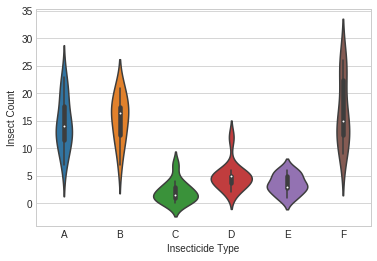

In [50]:
#1.3
labels = np.unique(insect[:,1])
ldata = []
#slice out each set of rows that matches label
#and add to list
for l in labels:
    ldata.append(insect[insect[:,1] == l, 0].astype(float))
sns.violinplot(data=ldata)
plt.xticks(range(len(labels)), labels)
plt.xlabel('Insecticide Type')
plt.ylabel('Insect Count')
plt.show()

In [54]:
#1.4
print('C is best and its mean is {:.2}'.format(np.mean(ldata[2])))

C is best and its mean is 2.1


3. NY Air Quality (6 Points)
===

Load the 'airquality' dataset and convert into to a numpy array. Make a scatter plot of wind (column 2, mph) and ozone concentration (column 0, ppb). Using the `plt.text` command, display the correlation coefficient in the plot. This data as `nan`, which means "not a number". You can select non-nans by using `x[~numpy.isnan(x)]`. You'll need to remove these to calculate correlation coefficient. 

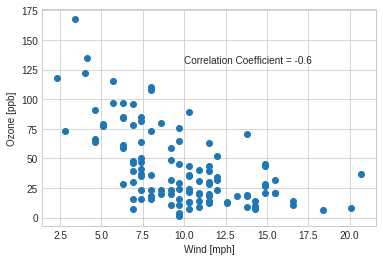

In [71]:
nyair = pydataset.data('airquality').as_matrix()
plt.plot(nyair[:,2], nyair[:,0], 'o')
plt.xlabel('Wind [mph]')
plt.ylabel('Ozone [ppb]')
nans = np.isnan(nyair[:,0])
r = np.corrcoef(nyair[~nans,2], nyair[~nans,0])[0,1]
plt.text(10, 130, 'Correlation Coefficient = {:.2}'.format(r))
plt.show()